**Class Task – Implement Linear Regression**

**Step 1: Import libraries**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2: Load your dataset**

In [2]:
df = pd.read_csv("train_cleaned.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Step 3: Choose features (X) and target (y)**

In [4]:
X = df[['GrLivArea', 'OverallQual', 'GarageCars']]  # input features
y = df['SalePrice']  # target variable

**Step 4: Split into train/test sets**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

**Step 5: Train Linear Regression Model**

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
# Check coefficients:
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -108200.27732242015
Coefficients: [   62.0759931  26354.97955418 19944.13277996]


**Step 6: Visualize Prediction vs Actual**

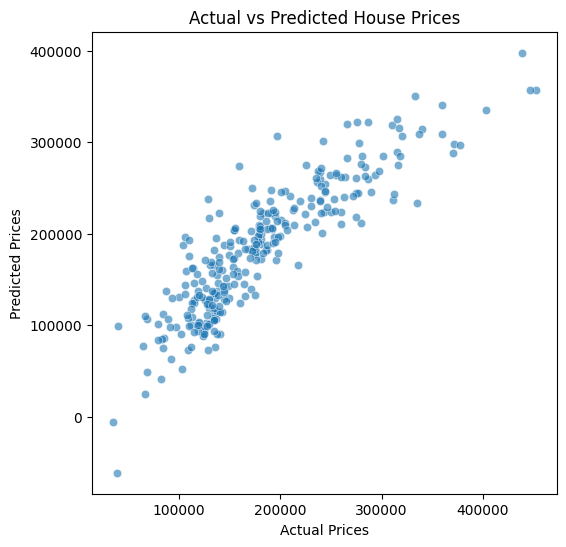

In [8]:
y_pred = model.predict(X_test)

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


* The regression model shows a positive linear trend — as living area and quality increase, predicted prices rise proportionally.

**Assignment 5 – Regression Evaluation (MAE, RMSE)**

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

**Step 1: Evaluate model**

In [11]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = model.score(X_test, y_test)

print("Mean Absolute Error (MAE):", mae, 2)
print("Root Mean Squared Error (RMSE):", rmse, 2)
print("R² Score:", round(r2, 2))

Mean Absolute Error (MAE): 26877.315105216487 2
Root Mean Squared Error (RMSE): 35091.58012382567 2
R² Score: 0.78


**Step 2: Compare & Interpret**

* Mean Absolute Error (MAE): 26877.315105216487
* Root Mean Squared Error (RMSE): 35091.58012382567

Interpretation:
* The model’s predictions are, on average, about $21,500 off the actual house price.
* RMSE is slightly higher since it penalizes larger errors more heavily.

## Regression Results Summary

| **Metric** | **Value** | **Description** |
|-------------|------------|-----------------|
| **MAE** | 26877.3 | Average absolute prediction error |
| **RMSE** | 35091.5 | Penalizes large prediction errors |
| **R² (optional)** | 0.78 | Model explains ~78% variance in price |

---

### Interpretation
- The **MAE** indicates that, on average, the model’s predictions differ from actual prices by about **21,500** units.  
- The **RMSE** (Root Mean Squared Error) is higher because it gives more weight to large errors.  
- The **R² score** of **0.78** means the regression model explains approximately **78% of the variance** in house prices — a reasonably good baseline model.
